In [136]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from multiprocessing import Pool
import healpy as hp
from astropy.coordinates import SkyCoord
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import random
from sklearn.svm import SVC
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [128]:
 # Importing the dataset containing optical clusters
df = pd.read_csv('ml_sample_real.csv', skiprows = 0, index_col=0)
df = df[(df.intensity090_act!=-9999)&(df.intensity150_act!=-9999)&(df.intensity220_act!=-9999)]

In [130]:
# Importing the dataset containing non-clusters
df2 = pd.read_csv('voids_complete.csv', skiprows = 0, index_col=0)
df2 = df2[(df2.intensity090_act!=-9999)&(df2.intensity150_act!=-9999)&(df2.intensity220_act!=-9999)]

# Importing the dataset containing non-clusters
# df2 = df[:1228] * 0
# df2['intensity100'] = np.loadtxt('../voids_signal100.csv',delimiter=', ')
# df2['intensity143'] = np.loadtxt('../voids_signal143.csv',delimiter=', ')
# df2['intensity353'] = np.loadtxt('../voids_signal.csv',delimiter=', ')
# df2['amf_ra'] = np.loadtxt('../voids_ras.csv',delimiter=', ')
# df2['amf_dec'] = np.loadtxt('../voids_decs.csv',delimiter=', ')
# df2_scaled_up = df2.copy()
# df2_scaled_up['intensity100'] = df2['intensity100']*2
# df2_scaled_up['intensity143'] = df2['intensity143']*2
# df2_scaled_up['intensity353'] = df2['intensity353']*2
# df2_scaled_down = df2.copy()
# df2_scaled_down['intensity100'] = df2['intensity100']/2
# df2_scaled_down['intensity143'] = df2['intensity143']/2
# df2_scaled_down['intensity353'] = df2['intensity353']/2
# df2 = pd.concat([df2, df2_scaled_up, df2_scaled_down])

In [133]:
# Combine real and fake data
df3 = df.append(df2, ignore_index=True)

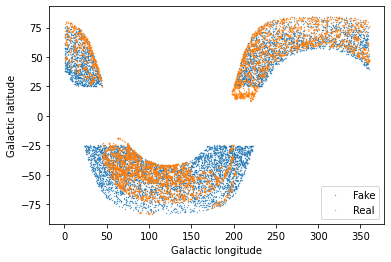

In [134]:
plt.scatter(df2['glon'],df2['glat'],s=0.1,label='Fake')
plt.scatter(df['glon'],df['glat'],s=0.1,label='Real')
plt.xlabel("Galactic longitude")
plt.ylabel("Galactic latitude")
plt.legend()

---

# Classification of clusters vs non clusters

In [137]:
# From the signal in the 100Ghz image and 353Ghz image, determine the expected signal in 143Ghz
# 50 percent of the sample has richness over 27, use the richer sample for training
intensity_clusters = df[['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']]
intensity_voids = df2[['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']]
intensity_combined = df3[['intensity090_act','intensity100','intensity143','intensity150_act','intensity217','intensity220_act','intensity353','intensity545','intensity857','intensity_rosat']]
cluster_tag = df3['cluster']

# Fit full sample with their associated classficiation
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(intensity_combined, cluster_tag)

# clf = SVC()
#clf = svm.SVR()
# clf.fit(intensity_combined, cluster_tag)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [138]:
cluster = np.array([clf.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_clusters.values]).flatten()

In [139]:
no_cluster = np.array([clf.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_voids.values]).flatten()

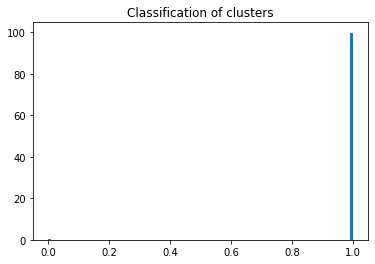

In [140]:
plt.hist(cluster,bins=100,range=(0,1),density=True)
plt.title("Classification of clusters")
plt.show()

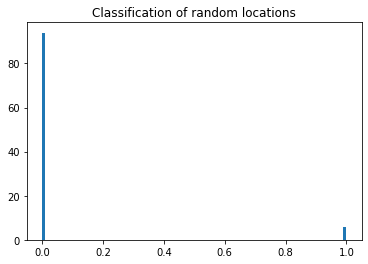

In [141]:
plt.hist(no_cluster,bins=100,range=(0,1),density=True)
plt.title("Classification of random locations")
plt.show()

---

# Identification of clusters

In [142]:
# Csv importer wrapped in a function that can be mapped for parallelization
def read_csv(filename):
    return pd.DataFrame(np.loadtxt(filename,delimiter=', ')).T

In [170]:
links100 = ['../data/results100_1.csv','../data/results100_2.csv','../data/results100_3.csv',
         '../data/results100_4.csv','../data/results100_5.csv','../data/results100_6.csv',
         '../data/results100_7.csv','../data/results100_8.csv','../data/results100_9.csv',
         '../data/results100_10.csv']
links143 = ['../data/results143_1.csv','../data/results143_2.csv','../data/results143_3.csv',
         '../data/results143_4.csv','../data/results143_5.csv','../data/results143_6.csv',
         '../data/results143_7.csv','../data/results143_8.csv','../data/results143_9.csv',
         '../data/results143_10.csv']
links353 = ['../data/results353_1.csv','../data/results353_2.csv','../data/results353_3.csv',
         '../data/results353_4.csv','../data/results353_5.csv','../data/results353_6.csv',
         '../data/results353_7.csv','../data/results353_8.csv','../data/results353_9.csv',
         '../data/results353_10.csv']
links545 = ['../data/results545_1.csv','../data/results545_2.csv','../data/results545_3.csv',
         '../data/results545_4.csv','../data/results545_5.csv','../data/results545_6.csv',
         '../data/results545_7.csv','../data/results545_8.csv','../data/results545_9.csv',
         '../data/results545_10.csv']
links857 = ['../data/results857_1.csv','../data/results857_2.csv','../data/results857_3.csv',
         '../data/results857_4.csv','../data/results857_5.csv','../data/results857_6.csv',
         '../data/results857_7.csv','../data/results857_8.csv','../data/results857_9.csv',
         '../data/results857_10.csv']

linksrosat = ['../voids_y_rosat_full_sky.csv']
links090 = ['../voids_y_act90_full_sky.csv']
links150 = ['../voids_y_150_full_sky.csv']
links220 = ['../voids_y_220_full_sky.csv']
links217 = ['voids_y_217_full_sky.csv']

In [171]:
data090 = pd.DataFrame()
data100 = pd.DataFrame()
data143 = pd.DataFrame()
data150 = pd.DataFrame()
data217 = pd.DataFrame()
data220 = pd.DataFrame()
data353 = pd.DataFrame()
data545 = pd.DataFrame()
data857 = pd.DataFrame()
datarosat = pd.DataFrame()

for links in [links090,links100,links143,links150,links217,links220,links353,links545,links857,linksrosat]:
    if links==links090:
        for link in links:
            data090 = pd.concat([data090,pd.DataFrame(np.loadtxt(link,delimiter=', '))])    
    if links==links100:
        for link in links:
            data100 = pd.concat([data100,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links143:
        for link in links:
            data143 = pd.concat([data143,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links150:
        for link in links:
            data150 = pd.concat([data150,pd.DataFrame(np.loadtxt(link,delimiter=', '))])
    if links==links217:
        for link in links:
            data217 = pd.concat([data217,pd.DataFrame(np.loadtxt(link,delimiter=', '))])
    if links==links220:
        for link in links:
            data220 = pd.concat([data220,pd.DataFrame(np.loadtxt(link,delimiter=', '))])            
    if links==links353:
        for link in links:
            data353 = pd.concat([data353,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links545:
        for link in links:
            data545 = pd.concat([data545,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])
    if links==links857:
        for link in links:
            data857 = pd.concat([data857,pd.DataFrame(np.loadtxt(link,delimiter=', ')).T])            
    if links==linksrosat:
        for link in links:
            datarosat = pd.concat([datarosat,pd.DataFrame(np.loadtxt(link,delimiter=', '))])


In [173]:
# Convert the RA and DEC to galactic coordinates
c = SkyCoord(data100[1],data100[2],frame='icrs',unit='deg')
data100['glat'] = c.galactic.b.degree
data100['glon'] = c.galactic.l.degree

In [174]:
# initialize data of lists.
data_all = {'glat':data100['glat'].values,
            'glon':data100['glon'].values,
            'int090':data090[0].values,
            'int100':data100[0].values,
            'int143':data143[0].values,
            'int150':data150[0].values,
            'int217':data217[0].values,
            'int220':data220[0].values,
            'int353':data353[0].values,
            'int545':data545[0].values,
            'int857':data857[0].values,
            'introsat':datarosat[0].values}
 
intensity_all = pd.DataFrame(data_all)

In [175]:
intensity_all

,glat,glon,int090,int100,int143,int150,int217,int220,int353,int545,int857,introsat
0,-27.128252,302.931925,-9999.0,-0.000073,-0.000048,-9999.0,0.000185,-9999.0,0.002265,2.287474,6.347861,0.000093
1,-27.128252,302.931925,-9999.0,-0.000074,-0.000048,-9999.0,0.000185,-9999.0,0.002269,2.286885,6.347425,0.000097
2,-27.128252,302.931925,-9999.0,-0.000074,-0.000047,-9999.0,0.000186,-9999.0,0.002272,2.286257,6.346549,0.000106
3,-27.128252,302.931925,-9999.0,-0.000075,-0.000047,-9999.0,0.000186,-9999.0,0.002274,2.285667,6.345428,0.000121
4,-27.128252,302.931925,-9999.0,-0.000076,-0.000047,-9999.0,0.000187,-9999.0,0.002275,2.285188,6.344205,0.000140
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,27.128252,122.931925,-9999.0,0.000031,0.000087,-9999.0,0.000344,-9999.0,0.002582,2.476438,6.841576,0.000161
59996,27.128252,122.931925,-9999.0,0.000032,0.000087,-9999.0,0.000345,-9999.0,0.002583,2.476450,6.841960,0.000153
59997,27.128252,122.931925,-9999.0,0.000032,0.000087,-9999.0,0.000344,-9999.0,0.002583,2.476401,6.842011,0.000147
59998,27.128252,122.931925,-9999.0,0.000031,0.000087,-9999.0,0.000344,-9999.0,0.002583,2.476242,6.841590,0.000142


In [176]:
# cluster_prob = np.array([clf.predict([[i100,i143,i353,i545,i857]]) for i100,i143,i353,i545,i857 in intensity_all[['int100', 'int143', 'int353', 'int545', 'int857']].values]).flatten()
cluster_prob = np.array([clf.predict([[i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat]]) for i090, i100, i143, i150, i217, i220, i353, i545, i857, irosat in intensity_all[['int090','int100','int143','int150','int217','int220','int353','int545','int857','introsat']].values]).flatten()

In [177]:
intensity_all['cluster']=cluster_prob

In [178]:
pl143 = hp.read_map('../data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits')

/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/maamari/Documents/Other/Anaconda/lib/python3.7/site-packages/healpy/fitsfunc.py:403: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


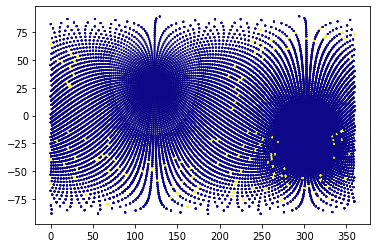

In [180]:
# hp.mollview(pl143,norm='hist',cmap='Greys',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(df['glon'],df['glat'],c='red',lonlat=True,s=0.01)
# hp.visufunc.projscatter(df2['glon'],df2['glat'],c='blue',lonlat=True,s=0.01)
plt.scatter(intensity_all['glon'],intensity_all['glat'],c=intensity_all.cluster,cmap='plasma',s=1)
# plt.scatter(df['glon'],df['glat'],c='r',s=1)